<a href="https://colab.research.google.com/github/CQNKZX/Thesis/blob/master/Constant_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Numerically solve the ODE system from the constant control problem
import time
import math
import numpy as np
import matplotlib.pyplot as plt

time step length is 0.0005
space step length is 0.1


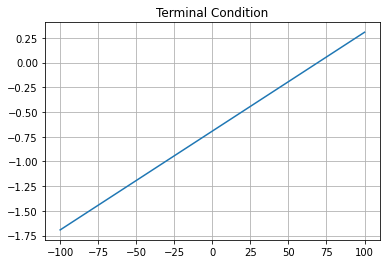

In [ ]:
# FDM parameters
T = 0.2 # horizon [0, T]
X = 100 # price range will be [-X, X]
Nt = 400 # number of time steps
Nx = 1000 # number of price grid on one side(2*Nx grid in total)
dt = T / Nt # time step
dx = X / Nx # price step
print("time step length is", dt)
print("space step length is", dx)

# prior parameters of the drift
m0 = 0.03
s0 = 0.3
# market parameters
vol = 0.3 # volatility
r = 0.01 # interest rate
gamma = 0.5 # utility function exponent

# control set
alf = 2
# low, high = 0.9, 1 # how many time can we short/long stock

#Terminal condition for b(t) and c(t)
b_T, c_T = 0.01, np.log(gamma)
# data initialization
B = np.zeros((2*Nx + 1, Nt + 1)) # store data without BC
b_sol = np.zeros((1, Nt + 1)) # store ODE result
c_sol = np.zeros((1, Nt + 1))
# fill data at time T for different prices
for i in range(0, 2*Nx + 1):
  #t = T
  x = (i - Nx) * dx
  # apply a linear terminal condition
  B[i, -1] = 0.01 * x + np.log(gamma)
  b_sol[0, -1] = b_T
  c_sol[0, -1] = c_T
plt.plot((np.arange(0, 2*Nx + 1)-Nx) * dx, B[:,-1])
plt.grid(True)
plt.title("Terminal Condition")
plt.show()

In [ ]:
#Solve the ODEs and update B
for j in range(Nt-1, -1, -1):
  t = j * dt
  #update b_sol and c_sol.
  b_sol[0,j] = b_T + (1-gamma) * alf * s0**2 * (T - t) / (vol**2 + t * s0**2)
  p0 = m0 * vol**2 / (vol**2 + t * s0**2)
  p1 = b_sol[0,j] * (p0 + (1-gamma)*vol**2*alf)
  p2 = vol**2 * (b_sol[0,j])**2 / 2 + (1 - gamma) * r
  p3 = (gamma - 1) * gamma * vol**2 * alf**2 / 2
  p4 = (1 - gamma) * (p0 + vol**2 / 2 - r) * alf
  c_sol[0,j] = c_sol[0,j+1] + dt * (p1 + p2 + p3 + p4)
  #update B[i,j]
  for i in range(Nt-1-j, 2*Nx + 2 - Nt + j):
    x = (i - Nx) * dx
    B[i,j] = b_sol[0,j] * x + c_sol[0,j]


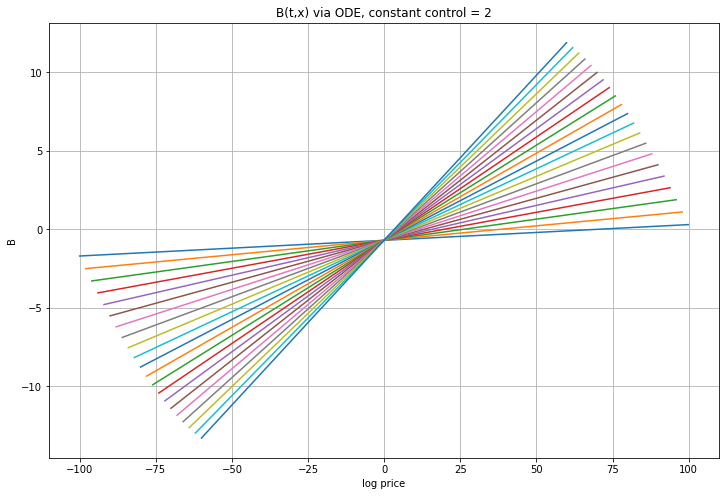

In [ ]:
#visualize
fig0= plt.figure(figsize=(12,8))
for j in range(Nt, -1, -1):
    idx = np.arange(Nt - j, 2*Nx - (Nt - j))
    if j%20 ==0:
        plt.plot(dx*(idx-Nx), B[idx,j])
   
plt.grid(True)
plt.title("B(t,x) via ODE, constant control = 2")
plt.xlabel("log price")
plt.ylabel("B")
plt.show()

In [ ]:
np.save("ODE_sol",B)